In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import ipywidgets as widgets
from ipywidgets import interactive, Layout

import warnings
warnings.filterwarnings('ignore')


In [14]:
#importing the concatenated file 

df = pd.read_csv('master_discharge _list')

In [15]:
#listing columns

df.columns

Index(['Hospital Service Area', 'Hospital County', 'Facility Name',
       'Age Group', 'Zip Code - 3 digits', 'Gender', 'Length of Stay',
       'Type of Admission', 'Discharge Year', 'CCSR Diagnosis Description',
       'APR DRG Description', 'APR MDC Description',
       'APR Severity of Illness Code', 'APR Severity of Illness Description',
       'APR Risk of Mortality'],
      dtype='object')

In [16]:
#noted during the preprocessing of the yearly data, there was a diffewrence in how variables were inputted, 
#some in capitals and others in lower case, we will convert relevant columns to lower case
#Changing name of column from 'Discharge Year' to 'Year'

df['CCSR Diagnosis Description'] = df['CCSR Diagnosis Description'].str.lower()
df['APR DRG Description'] = df['APR DRG Description'].str.lower()
df['APR MDC Description'] = df['APR MDC Description'].str.lower()
df.rename(columns = {'Discharge Year' : 'year'}, inplace = True)

In [17]:
#listing coluimns to verify change

df.columns

Index(['Hospital Service Area', 'Hospital County', 'Facility Name',
       'Age Group', 'Zip Code - 3 digits', 'Gender', 'Length of Stay',
       'Type of Admission', 'year', 'CCSR Diagnosis Description',
       'APR DRG Description', 'APR MDC Description',
       'APR Severity of Illness Code', 'APR Severity of Illness Description',
       'APR Risk of Mortality'],
      dtype='object')

In [18]:
df.shape

(320960, 15)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 320960 entries, 0 to 320959
Data columns (total 15 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   Hospital Service Area                320960 non-null  object 
 1   Hospital County                      320960 non-null  object 
 2   Facility Name                        320960 non-null  object 
 3   Age Group                            320960 non-null  object 
 4   Zip Code - 3 digits                  320960 non-null  object 
 5   Gender                               320960 non-null  object 
 6   Length of Stay                       320960 non-null  object 
 7   Type of Admission                    320960 non-null  object 
 8   year                                 320960 non-null  int64  
 9   CCSR Diagnosis Description           320960 non-null  object 
 10  APR DRG Description                  320960 non-null  object 
 11  APR MDC Descr

In [20]:
#creating an interactive interactive bar plot with slider for year and a drop down menu for hospital county
#This will allow user to see Top 5 diagnoses per year by county


def update(year_filter, county_filter):
    filtered_df = df[(df['year'] == year_filter) & (df['Hospital County'] == county_filter)]
    
#building the barplot in seaborn, using a colorblind palette
    
    plt.figure(figsize=(8, 5))
    sns.barplot(x = filtered_df['CCSR Diagnosis Description'].value_counts()[:5].index,
                y = filtered_df['CCSR Diagnosis Description'].value_counts()[:5].values, palette = 'colorblind')
    
    plt.xticks(rotation = 90)
    plt.title(f'Top % diagnoses in {year_filter} - {county_filter}')
    plt.show()
            

In [21]:
#we will create an interactive slider for the year using a widget from ipywidgets
#we use the IntSlider widget, defining the min and max bounds, the increment step is 1, for year.
#Layout then the size of the slider bar

year_selector = widgets.IntSlider(
min = df['year'].min(),
max = df['year'].max(),
step = 1,
description = 'Select Year:',
layout = Layout(width = '400px'))


In [22]:
#we will use the dropdown widget from ipywidget to select the Hospital County

county_selector = widgets.Dropdown(options = df['Hospital County'].unique(),
                                   description = 'Select County:',
                                   layout = Layout(width = '200px'))


In [23]:
#making this plot interactive we call in the interactive function from ipywidgets

interactive_plot = interactive(update, year_filter = year_selector, county_filter = county_selector)
output = interactive_plot.children[-1]
output.layout.height = '1100px'
interactive_plot


interactive(children=(IntSlider(value=2016, description='Select Year:', layout=Layout(width='400px'), max=2021…

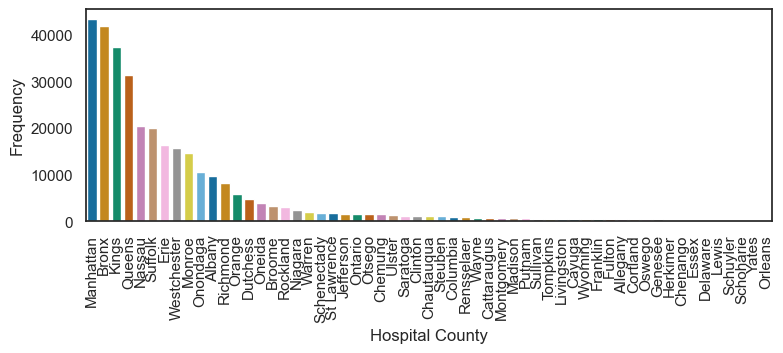

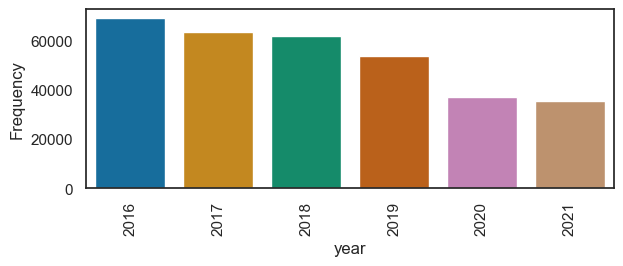

In [24]:
#We will create a panel of categorical analysis, 
#we will look at the hospital county and year 
#defining the categorical columns as cat_cols

cat_cols = ['Hospital County', 'year']

#creating a 2 panel single column frequency charts,in descending order on the graphs

rows = 2
columns = 1
index = 1

plt.figure(figsize = (8,6))
sns.set(style = 'white')

for i in cat_cols:
    plt.subplot(rows, columns, index)
    sns.countplot(x = df[i], order = df[i].value_counts().index, palette = 'colorblind')
    
    plt.ylabel('Frequency')
    plt.xticks(rotation = 90)
    index +=1
    
    plt.tight_layout()
    plt.show()




In [25]:
df1 = pd.read_csv('queens_data.csv')

In [26]:
df1.shape


(20855, 23)

In [27]:
df1.columns


Index(['date', 'source', 'site_id', 'poc', 'daily_mean_pm2.5_concentration',
       'units', 'daily_aqi_value', 'site_name', 'daily_obs_count',
       'percent_complete', 'aqs_parameter_code', 'aqs_parameter_desc',
       'cbsa_code', 'cbsa_name', 'state_code', 'state', 'county_code',
       'county', 'site_latitude', 'site_longitude', 'year', 'month', 'day'],
      dtype='object')

In [28]:
df1.head(2)

,date,source,site_id,poc,daily_mean_pm2.5_concentration,units,daily_aqi_value,site_name,daily_obs_count,percent_complete,...,cbsa_name,state_code,state,county_code,county,site_latitude,site_longitude,year,month,day
0,1999-07-02,AQS,360810097,1,22.0,ug/m3 LC,72,QUEENSBORO COMMUNITY COLLEGE,1,100.0,...,"New York-Newark-Jersey City, NY-NJ-PA",36,New York,81,Queens,40.75527,-73.75861,1999,7,2
1,1999-07-05,AQS,360810097,1,27.8,ug/m3 LC,84,QUEENSBORO COMMUNITY COLLEGE,1,100.0,...,"New York-Newark-Jersey City, NY-NJ-PA",36,New York,81,Queens,40.75527,-73.75861,1999,7,5


In [29]:
#trimmimg back queens data set to 2016 to 2021

df2 = df1[(df1['year'] >= 2016) & (df1['year'] <= 2021)]

In [30]:
df2.shape

(7424, 23)

In [31]:
df2.columns

Index(['date', 'source', 'site_id', 'poc', 'daily_mean_pm2.5_concentration',
       'units', 'daily_aqi_value', 'site_name', 'daily_obs_count',
       'percent_complete', 'aqs_parameter_code', 'aqs_parameter_desc',
       'cbsa_code', 'cbsa_name', 'state_code', 'state', 'county_code',
       'county', 'site_latitude', 'site_longitude', 'year', 'month', 'day'],
      dtype='object')

In [32]:
#Taking hospital county'Queens' and 'asthma' data from master list

df3 = df[(df['CCSR Diagnosis Description'] == 'asthma') & (df['Hospital County'] == 'Queens')]

In [33]:
df3.shape

(7682, 15)

In [34]:
df3['year'] = df3['year'].astype('object')

In [35]:
df3.head(2)

,Hospital Service Area,Hospital County,Facility Name,Age Group,Zip Code - 3 digits,Gender,Length of Stay,Type of Admission,year,CCSR Diagnosis Description,APR DRG Description,APR MDC Description,APR Severity of Illness Code,APR Severity of Illness Description,APR Risk of Mortality
52186,New York City,Queens,Elmhurst Hospital Center,18 to 29,113,M,2,Emergency,2016,asthma,asthma,diseases and disorders of the respiratory system,1.0,Minor,Minor
52189,New York City,Queens,Elmhurst Hospital Center,30 to 49,113,M,3,Emergency,2016,asthma,asthma,diseases and disorders of the respiratory system,1.0,Minor,Minor


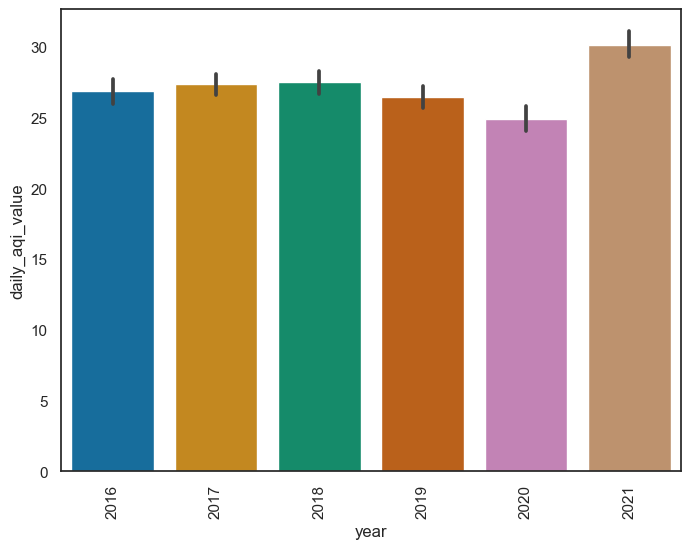

In [36]:
plt.figure(figsize=(8,6))
plt.xticks(rotation=90)
sns.barplot(x="year", y="daily_aqi_value", data=df2, palette = 'colorblind')
legend = False

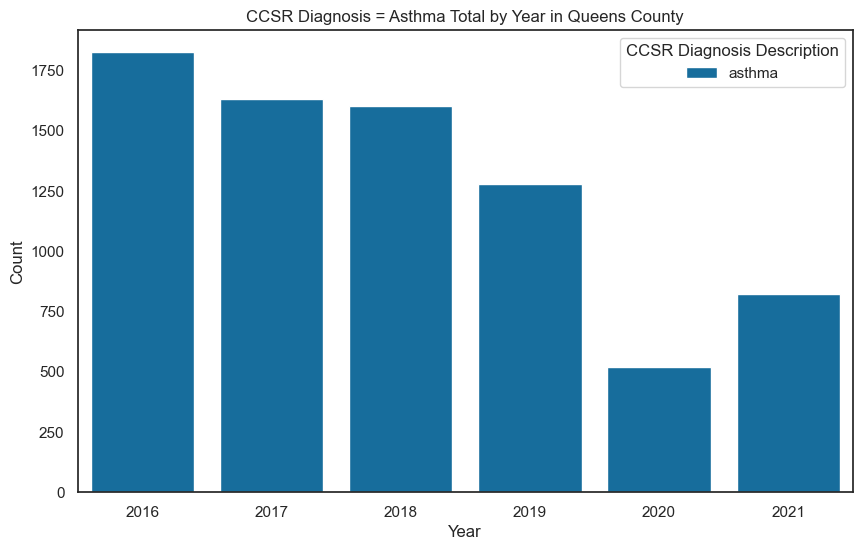

In [37]:
# grouping the cssr diagnosis and year into it's own frame for charting
grouped_df = df3.groupby(['year', 'CCSR Diagnosis Description']).size().reset_index(name='Count')

plt.figure(figsize=(10, 6))
sns.barplot(x='year', y='Count', hue='CCSR Diagnosis Description', data=grouped_df,palette = 'colorblind' )
plt.title('CCSR Diagnosis = Asthma Total by Year in Queens County')
plt.xlabel('Year')
plt.ylabel('Count')
plt.show()


In [38]:
#All hospitals in Queens County

df3['Facility Name'].unique()

array(['Elmhurst Hospital Center', 'Flushing Hospital Medical Center',
       'Jamaica Hospital Medical Center',
       'Long Island Jewish Medical Center', 'Queens Hospital Center',
       'St Johns Episcopal Hospital So Shore',
       'NewYork-Presbyterian/Queens', 'Long Island Jewish Forest Hills',
       'Mount Sinai Hospital - Mount Sinai Hospital of Queens',
       "Long Island Jewish Schneiders Children's Hospital Division",
       'New York - Presbyterian/Queens',
       "Cohen Children's Medical Center"], dtype=object)

In [39]:
# Using the hospital list from the master discharge list for the Hospital County Queens 
#we will pull the latitude and longitude coordinates from GeoPy, 
#this has a datahub of locations without having to use an APIby usingthe Nomantim geocoder for OpenStreetMap data

#pip install geopy

from geopy.geocoders import Nominatim


locations = [
    'Elmhurst Hospital Center', 'Flushing Hospital Medical Center',
    'Jamaica Hospital Medical Center', 'Long Island Jewish Medical Center',
    'Queens Hospital Center', "St John's Episcopal Hospital",
    'NewYork-Presbyterian/Queens', 'Long Island Jewish Forest Hills',
    'Mount Sinai Hospital - Mount Sinai Hospital of Queens',
    "Long Island Jewish Schneiders Children's Hospital Division",
    'New York - Presbyterian/Queens', "Cohen Children's Medical Center"
]
#'Long Island Jewish Schneiders Children's Hospital Division' is part of the 'Long Island Jewish Medical Center'
#St Johns Episcopal Hospital So Shore' is listed on the map as 'St John's Episcopal Hospital'

coordinates = {'Facility Name': [], 'Latitude': [], 'Longitude': []}

geolocator = Nominatim(user_agent="my_geocoder")

for location in locations:
    try:
        location_info = geolocator.geocode(location)
        if location_info:
            coordinates['Facility Name'].append(location)
            coordinates['Latitude'].append(location_info.latitude)
            coordinates['Longitude'].append(location_info.longitude)
    except Exception as e:
        print(f"Error processing {location}: {str(e)}")
        
        
 #Create a DataFrame
df4 = pd.DataFrame(coordinates)

df4

,Facility Name,Latitude,Longitude
0,Elmhurst Hospital Center,40.744770,-73.885647
1,Flushing Hospital Medical Center,40.755445,-73.816759
2,Jamaica Hospital Medical Center,40.693751,-73.781315
3,Long Island Jewish Medical Center,40.755498,-73.706579
4,Queens Hospital Center,40.717866,-73.806066
5,St John's Episcopal Hospital,40.598688,-73.753461
6,NewYork-Presbyterian/Queens,40.747263,-73.825194
7,Long Island Jewish Forest Hills,40.729034,-73.851552
8,Mount Sinai Hospital - Mount Sinai Hospital of...,40.768107,-73.924939
9,New York - Presbyterian/Queens,40.754938,-73.893101


In [40]:
#Now that we have the hospital list ands location coordinates we can plot a map in folium with markers for each facility

import folium
from IPython.display import display

center_lat = df4['Latitude'].mean()
center_lon = df4['Longitude'].mean()
map_center = [center_lat, center_lon]
mymap = folium.Map(location=map_center, zoom_start=12)

# Adding markers for each facility
for index, row in df4.iterrows():
    folium.Marker([row['Latitude'], row['Longitude']], tooltip=row['Facility Name']).add_to(mymap)

display(mymap)